In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("../dataset/curated/marts_ml_train_sel_all.parquet")
df

,price,kamar_tidur,kamar_mandi,kamar_pembantu,kamar_mandi_pembantu,dapur,luas_tanah,luas_bangunan,jumlah_lantai,garasi,...,facility_aula,facility_canopy,facility_floorboards,facility_shed,facility_heating,facility_musholla,facility_gas,facility_mezzanine,facility_lemari_pakaian,facility_lemari_sepatu
0,2500.0,3,4,1,0,1,147.0,200.0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1400.0,3,2,0,0,1,105.0,120.0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2900.0,4,4,1,1,1,240.0,343.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,700.0,3,2,0,0,1,66.0,65.0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2700.0,5,5,1,1,1,320.0,300.0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18237,750.0,2,1,0,0,1,105.0,50.0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18238,1200.0,3,3,0,0,1,200.0,150.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18239,1150.0,5,4,0,0,1,208.0,110.0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18240,575.0,3,2,0,0,1,90.0,90.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

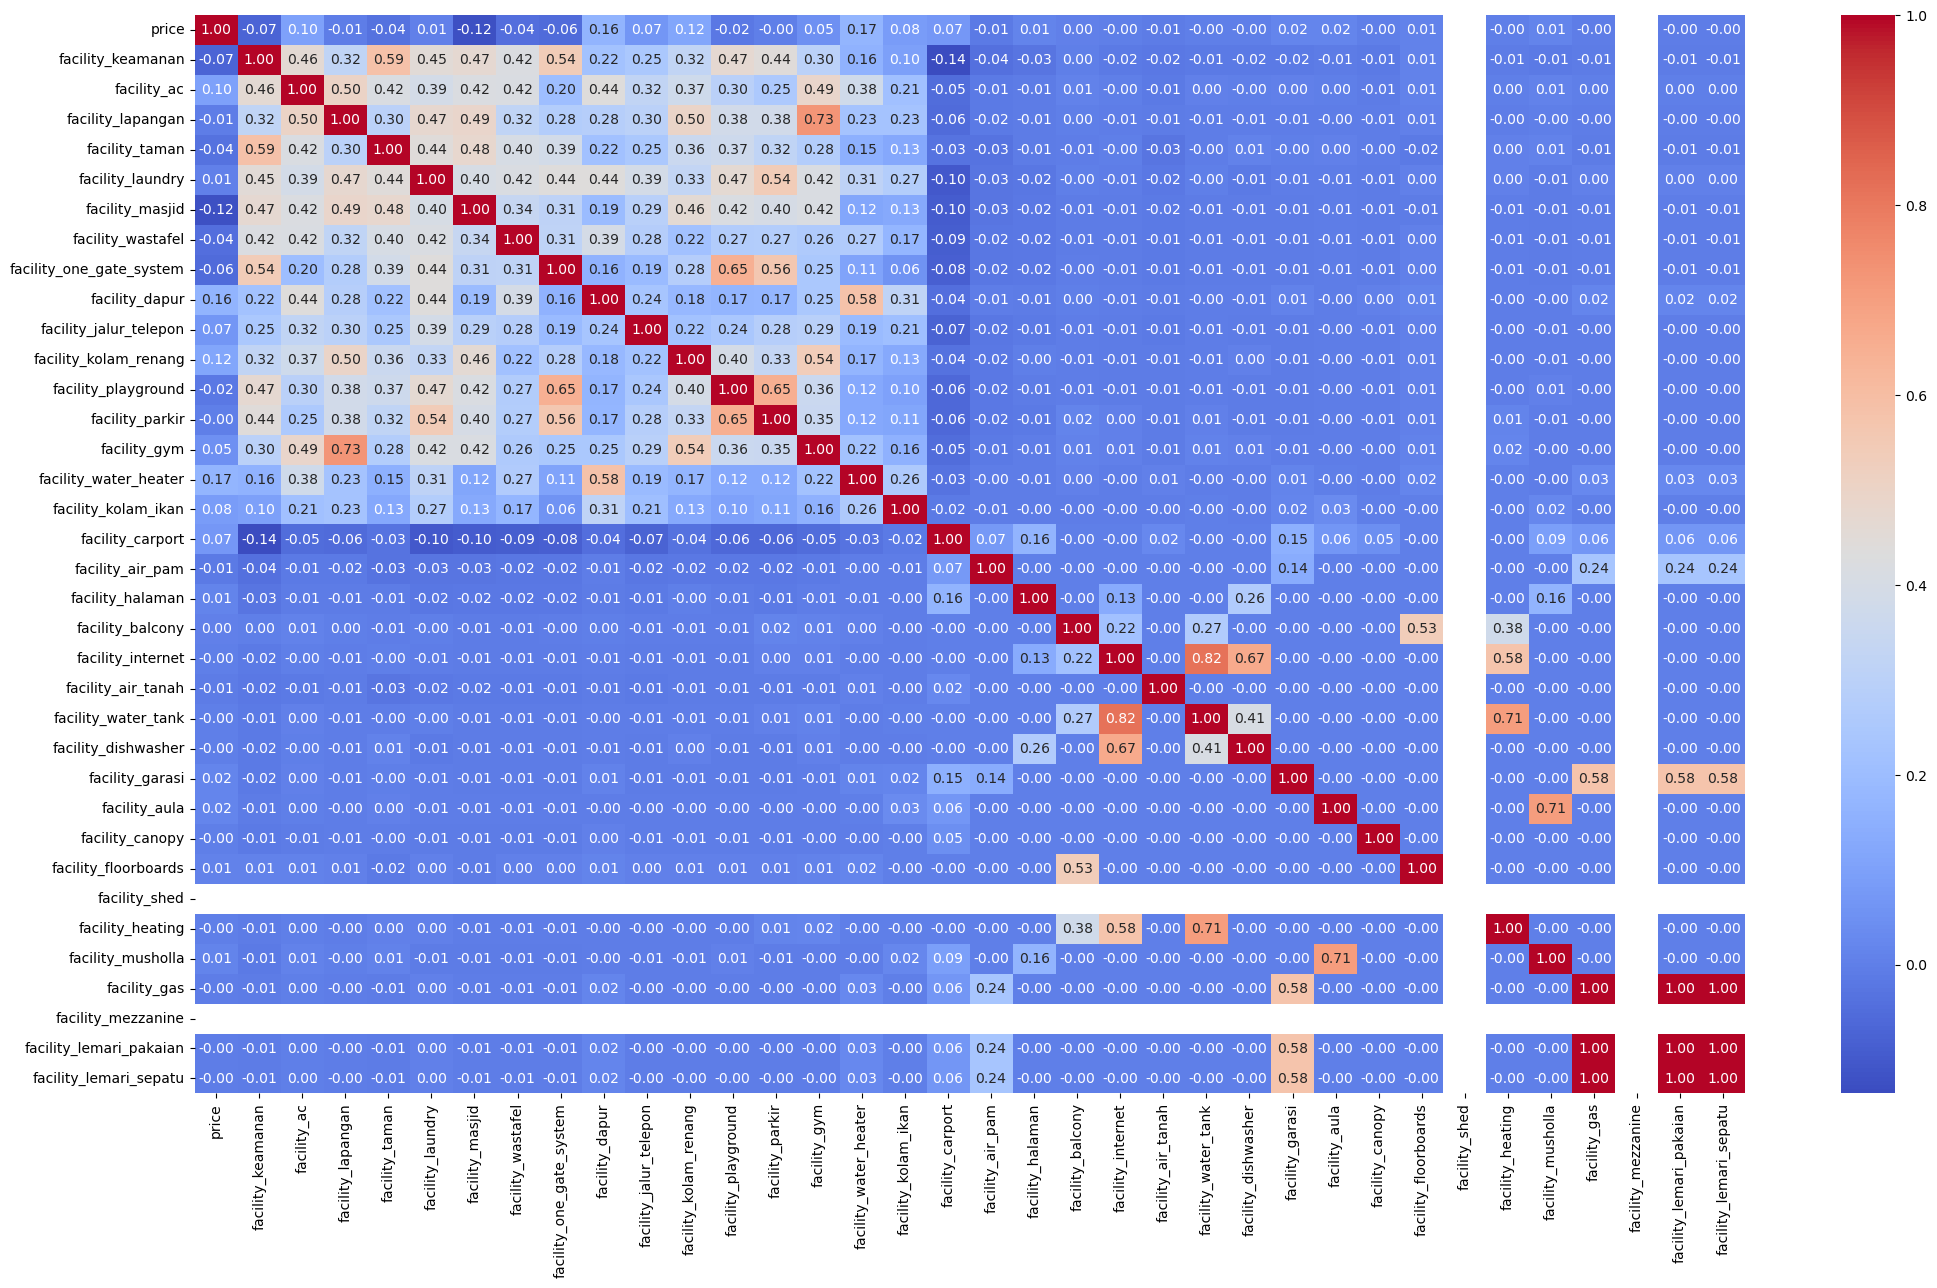

In [23]:
cols = ["price"] + [col for col in df.columns if col.startswith("facility_")]

fig, ax = plt.subplots(figsize=(25, 14))
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

<Axes: >

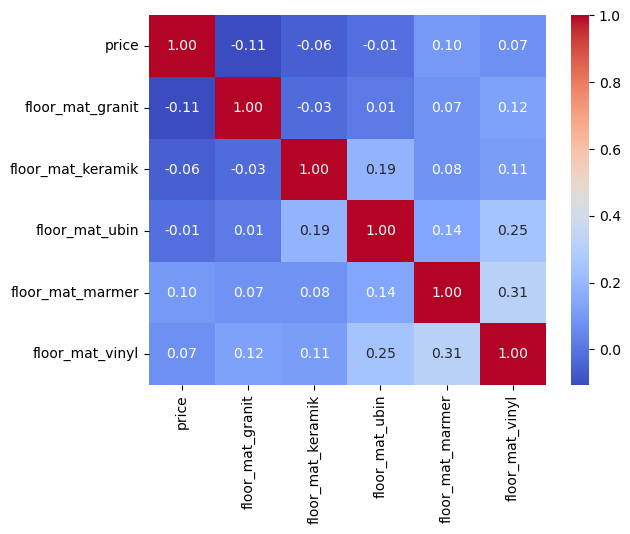

In [15]:
cols = ["price"] + [col for col in df.columns if col.startswith("floor_mat_")]
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")

<Axes: >

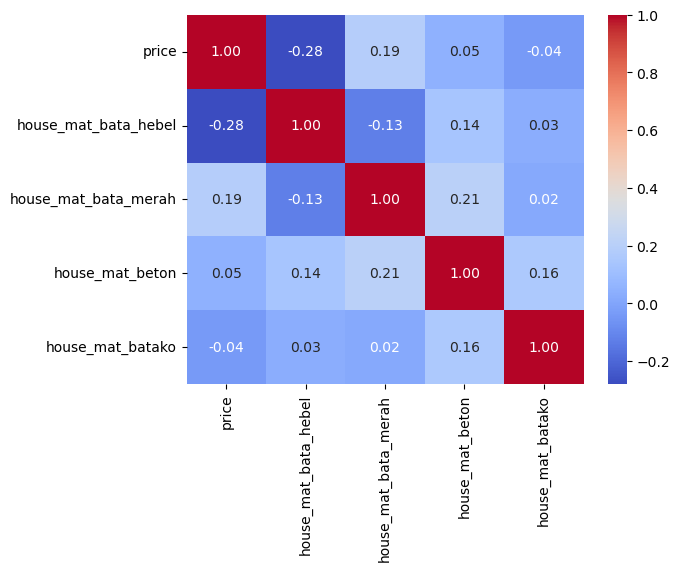

In [16]:
cols = ["price"] + [col for col in df.columns if col.startswith("house_mat_")]
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")

<Axes: >

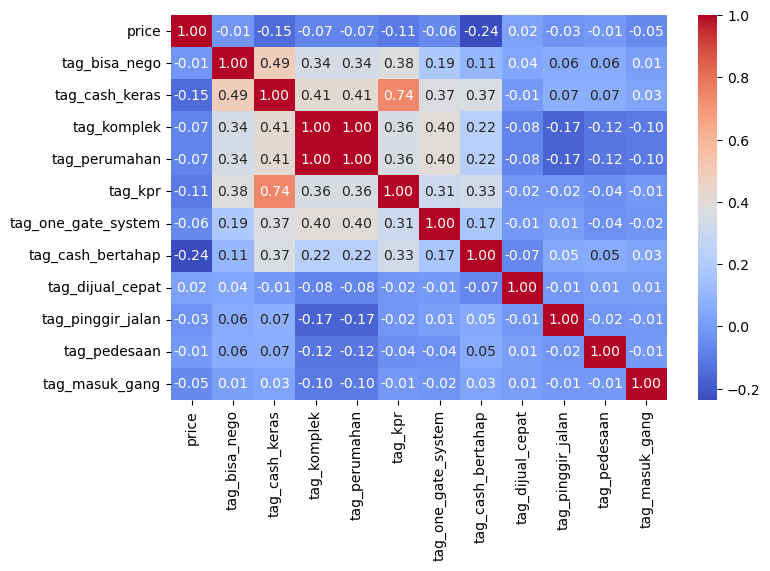

In [19]:
cols = ["price"] + [col for col in df.columns if col.startswith("tag_")]

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

<Axes: >

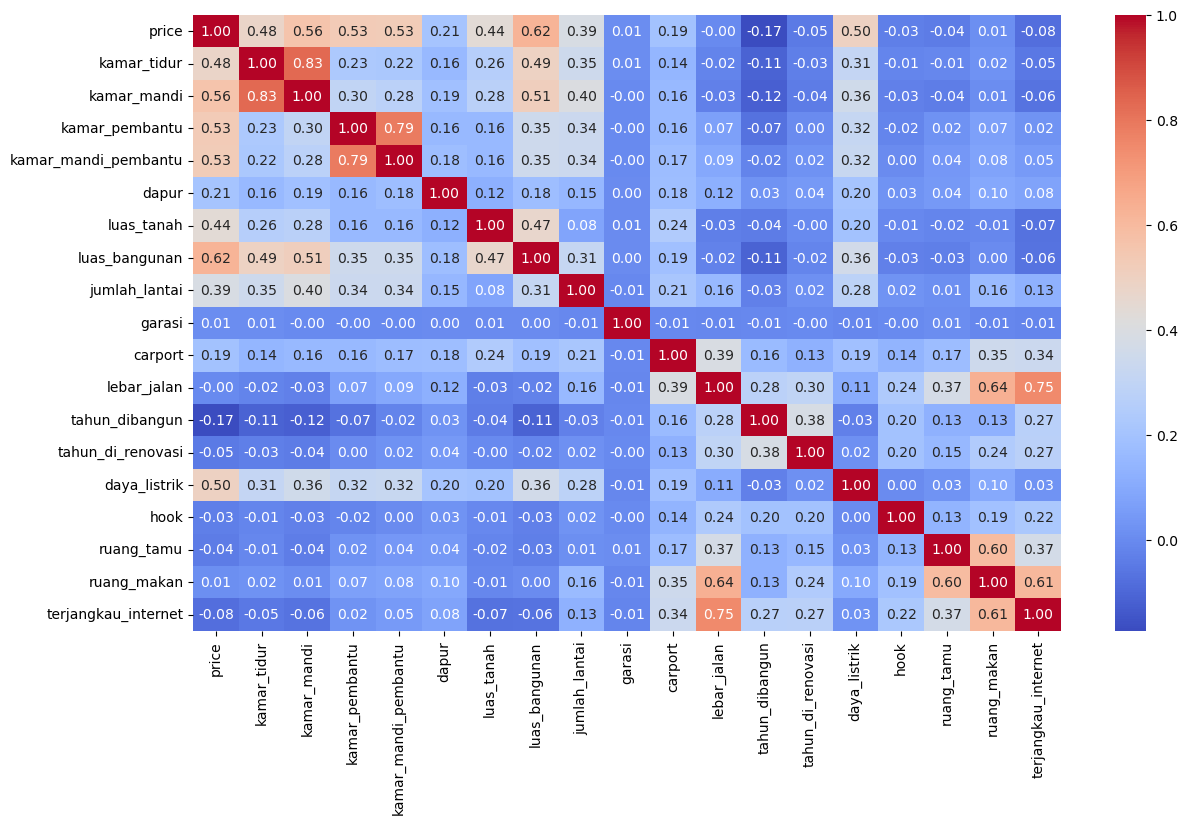

In [22]:
numeric_cols = df.select_dtypes('number').columns
cols = [col for col in df.columns if not col.startswith('facility_') and not col.startswith('tag_') and not col.startswith('floor_mat_') and not col.startswith('house_mat_')]
cols = [col for col in cols if col in numeric_cols]

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

<Axes: >

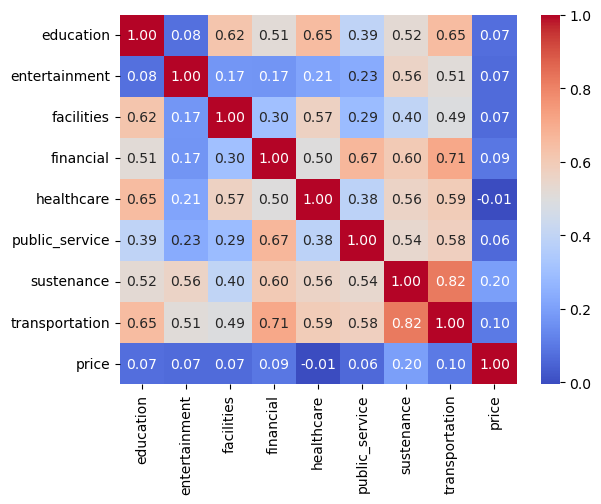

In [26]:
df_spatial = pd.read_csv("../dataset/curated/marts_spatial_price.csv")
sns.heatmap(df_spatial.drop(columns=["place"]).corr(), annot=True, fmt=".2f", cmap="coolwarm")